### Problem Statement

An Airport want a Data Scientist to develop a machine learning model that can be used to predict the Price of an airline when a
test data is passed to the model. As the Data Scientist, you are supposed to perform the ff tasks.

#### TASK

<ol>Develop a Machine Learning Model to predict price</ol>
<ol>Perform key analysis that will be important to the organization</ol>
<ol>Visualize relationship between some features in the dataset</ol>
<ol>Perform statistical and descriptive analysis on the data</ol>
<ol>Check for outliers, perform feature encoding and extract key features to model the data</ol>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [2]:
online_data = pd.read_excel(r'C:\\Users\\user\\PycharmProjects\\online_ticket_prices\\Data_Train.xlsx')
online_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
online_data.shape

(10683, 11)

In [4]:
online_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
online_data.Airline.values

array(['IndiGo', 'Air India', 'Jet Airways', ..., 'Jet Airways',
       'Vistara', 'Air India'], dtype=object)

In [6]:
for col in online_data.columns:
    print(online_data[col].values)
    print()

['IndiGo' 'Air India' 'Jet Airways' ... 'Jet Airways' 'Vistara'
 'Air India']

['24/03/2019' '1/05/2019' '9/06/2019' ... '27/04/2019' '01/03/2019'
 '9/05/2019']

['Banglore' 'Kolkata' 'Delhi' ... 'Banglore' 'Banglore' 'Delhi']

['New Delhi' 'Banglore' 'Cochin' ... 'Delhi' 'New Delhi' 'Cochin']

['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK' ...
 'BLR → DEL' 'BLR → DEL' 'DEL → GOI → BOM → COK']

['22:20' '05:50' '09:25' ... '08:20' '11:30' '10:55']

['01:10 22 Mar' '13:15' '04:25 10 Jun' ... '11:20' '14:10' '19:15']

['2h 50m' '7h 25m' '19h' ... '3h' '2h 40m' '8h 20m']

['non-stop' '2 stops' '2 stops' ... 'non-stop' 'non-stop' '2 stops']

['No info' 'No info' 'No info' ... 'No info' 'No info' 'No info']

[ 3897  7662 13882 ...  7229 12648 11753]



In [7]:
# converting datetime features from object datatype to datetime 
cols = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']
for col in cols:
    online_data[col] = pd.to_datetime(online_data[col])
online_data.dtypes

C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify in

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [8]:
# Breaking Date of Journey into Year, month and day since the machine learning model wont understand the special characters
online_data["DOJ_Year"] = online_data["Date_of_Journey"].dt.year
online_data["DOJ_Month"] = online_data["Date_of_Journey"].dt.month
online_data["DOJ_Day"] = online_data["Date_of_Journey"].dt.day
online_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ_Year,DOJ_Month,DOJ_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-18 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-18 05:50:00,2022-07-18 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-18 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6


In [9]:
online_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
DOJ_Year           0
DOJ_Month          0
DOJ_Day            0
dtype: int64

In [10]:
online_data.dropna(inplace=True)
online_data.drop('Date_of_Journey', axis=1, inplace=True)
online_data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ_Year,DOJ_Month,DOJ_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-07-18 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-18 05:50:00,2022-07-18 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-18 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6


In [11]:
online_data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
DOJ_Year           0
DOJ_Month          0
DOJ_Day            0
dtype: int64

In [12]:
def extract_timestamp(df, col):
    df[col+"_Hour"] = df[col].dt.hour
    df[col+"_Min"] = df[col].dt.minute
    df.drop(col, axis=1, inplace=True)
    return df.head(3)

In [13]:
for col in cols:
    if col == 'Date_of_Journey':
        pass
    else:
        extract_timestamp(online_data, col)

In [14]:
online_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DOJ_Year,DOJ_Month,DOJ_Day,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,9,6,9,25,4,25


In [15]:
# check for dirt in data by going through the unique values in each feature
for col in online_data.columns:
    print(col)
    print(online_data[col].unique())
    print()

Airline
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

Source
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Destination
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

Route
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR 

In [16]:
# cleaning dirt in Duration data 
def set_hour_min(x):
    if "h" not in x:
        x = '0h '+x
    elif "m" not in x:
        x = x+" 0m"
    return x

In [17]:
online_data['Duration'] = online_data['Duration'].apply(set_hour_min)

In [18]:
online_data.Duration

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [19]:
int(online_data['Duration'][0].split(' ')[0][0:-1])

2

In [20]:
online_data['Duration_hour'] = online_data['Duration'].apply(lambda x:int(online_data['Duration'][0].split(' ')[0][0:-1]))
online_data['Duration_min'] = online_data['Duration'].apply(lambda x:int(online_data['Duration'][1].split(' ')[0][0:-1]))
online_data.head(3) 

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DOJ_Year,DOJ_Month,DOJ_Day,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,7
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15,2,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,9,6,9,25,4,25,2,7


In [21]:
online_data.corr()['Price']

Price                1.000000
DOJ_Year                  NaN
DOJ_Month            0.010705
DOJ_Day             -0.165448
Dep_Time_Hour        0.006799
Dep_Time_Min        -0.024458
Arrival_Time_Hour    0.024244
Arrival_Time_Min    -0.086155
Duration_hour             NaN
Duration_min              NaN
Name: Price, dtype: float64

### Which destination records most flights for the various airlines?

In [22]:
# Finding the destination that records most flights for the various airlines
max_destination = online_data.groupby('Airline')['Destination'].value_counts()
max_destination

Airline                            Destination
Air Asia                           Banglore        150
                                   Cochin           80
                                   Delhi            71
                                   New Delhi        18
Air India                          Cochin          746
                                   Banglore        512
                                   New Delhi       212
                                   Hyderabad       136
                                   Delhi           120
                                   Kolkata          25
GoAir                              Cochin           76
                                   Delhi            69
                                   Banglore         25
                                   New Delhi        24
IndiGo                             Cochin          705
                                   Banglore        445
                                   Delhi           366
                  

In [23]:
# piechart plot to show destination and number of flights recorded
dest = online_data['Destination'].value_counts().reset_index()
dest.columns = ['Destination', "No. of flights"]
dest

,Destination,No. of flights
0,Cochin,4536
1,Banglore,2871
2,Delhi,1265
3,New Delhi,932
4,Hyderabad,697
5,Kolkata,381


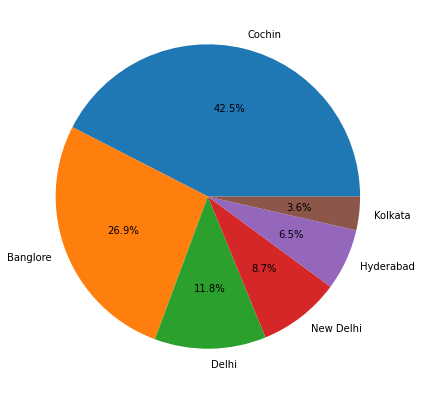

In [24]:
plt.figure(figsize=(9,7))
plt.pie(dest['No. of flights'], labels=dest['Destination'], autopct='%1.1f%%')
plt.show()

From the pie chart, Cochin records the most flights arriving at its airport. 

### Which route does Jet Airways use frequently?

In [25]:
# Finding the route jet airways use often
jet = online_data[online_data["Airline"]  == 'Jet Airways'].groupby('Route').size()
#groupby.size returns number of rows for each group
print(jet.sort_values(ascending=False))
print()
print("The route Jet Airways use often is {}".format(jet.sort_values(ascending=False).head(1)))

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

The route Jet Airways u

### What is the average price for each airline?

In [26]:
# finding relationship between airlines and average ticket price
airline_price = online_data.groupby('Airline')['Price'].mean()
airline_price

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [27]:
# finding out which airline average ticket price is highest 
airline_price.sort_values(ascending=False).head(1)

Airline
Jet Airways Business    58358.666667
Name: Price, dtype: float64

Jet Airways Business happens to have the highest average ticket price for a flight

Text(0.5, 1.0, 'Airline Avg Price')

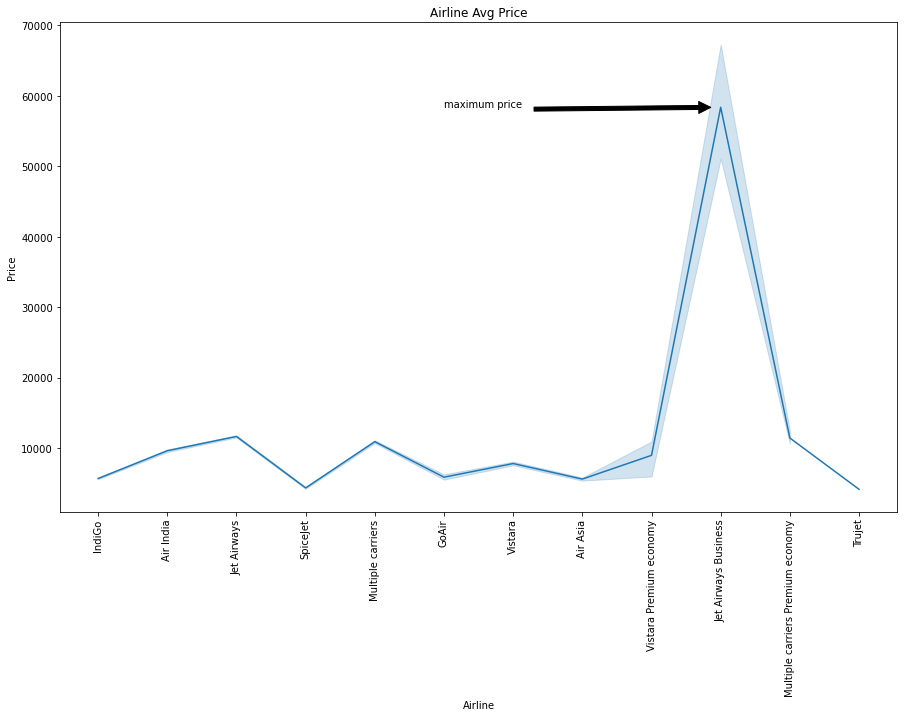

In [28]:
plt.figure(figsize=(15,9))
sns.lineplot(x=online_data['Airline'], y=online_data['Price'], data=online_data)
plt.annotate("maximum price", xy=("Jet Airways Business", 58358.666667), xytext=("GoAir", 58358.666667),arrowprops=dict(facecolor='black', shrink=0.05))
plt.xticks(rotation='vertical', fontsize=10)
plt.title("Airline Avg Price")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

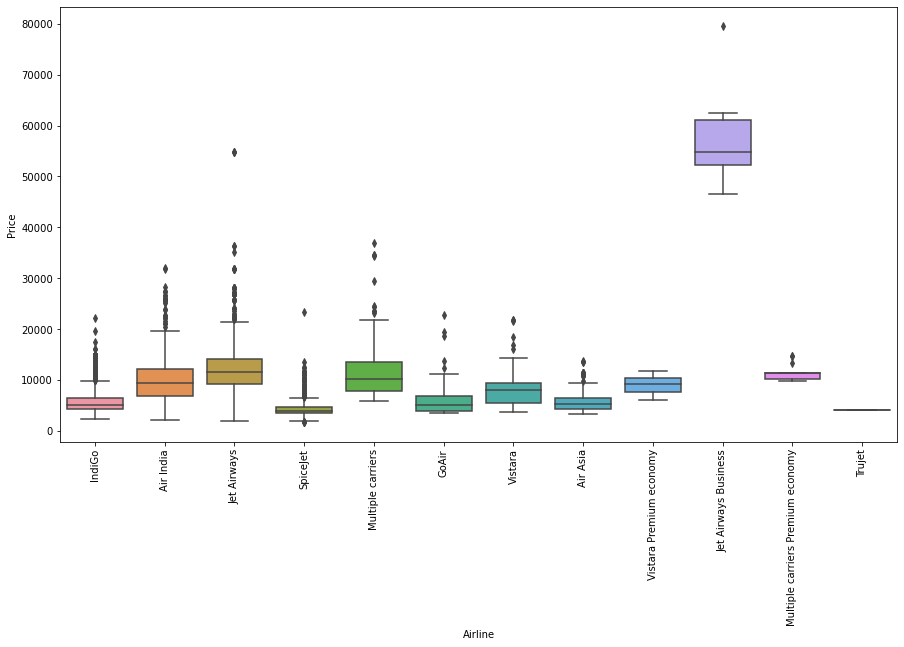

In [29]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='Price', x='Airline', data=online_data)
plt.xticks(rotation='vertical')

 As we can see there are outliers present in our price

### Building the Regression ML Model

In [30]:
# dropping features which will have no effect on the model
list = ['DOJ_Year', 'Route', 'Additional_Info', 'Duration']
for col in list:    
    online_data.drop(col, axis=1, inplace=True)

In [31]:
# separating features into categorical and numerical
categorical = []
for col in online_data.columns:
    if online_data[col].dtype == "O":
        categorical.append(col)
print(categorical)
print()

numerical = []
for col in online_data.columns:
    if online_data[col].dtype != "O":
        numerical.append(col)
print(numerical)

['Airline', 'Source', 'Destination', 'Total_Stops']

['Price', 'DOJ_Month', 'DOJ_Day', 'Dep_Time_Hour', 'Dep_Time_Min', 'Arrival_Time_Hour', 'Arrival_Time_Min', 'Duration_hour', 'Duration_min']


In [32]:
# feature encoding on categorical features
for feature in categorical:   
    print(feature)
    print(online_data[feature].unique())
    print()

Airline
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

Source
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Destination
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

Total_Stops
['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']



In [33]:
# Applying one hot feature encoding on Source categorical feature
for feature in online_data['Source'].unique():
    online_data['Source_'+feature] = online_data['Source'].apply(lambda x: 1 if x==feature else 0)

In [34]:
online_data.head()

,Airline,Source,Destination,Total_Stops,Price,DOJ_Month,DOJ_Day,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,7,1,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,2,7,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,2,7,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,2,7,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,2,7,1,0,0,0,0


In [35]:
# applying label/ordinal encoding on the Total Stops feature
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
online_data['Total_Stops'] = online_data['Total_Stops'].map(stops)

In [36]:
online_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,DOJ_Month,DOJ_Day,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,7,1,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,2,7,0,1,0,0,0


In [37]:
# applying mean encoding on the Airline feature
airlines = online_data.groupby('Airline')['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [38]:
dict = {value:i for i, value in enumerate(airlines,0)}
dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [39]:
online_data["Airline"] = online_data['Airline'].map(dict)
online_data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [40]:
# applying mean encoding on Destination feature
dest = online_data.groupby('Destination')['Price'].mean().sort_values().index
dict2 = {feature:i for i,feature in enumerate(dest,0)}
online_data['Destination'] = online_data['Destination'].map(dict2)
online_data.head()

,Airline,Source,Destination,Total_Stops,Price,DOJ_Month,DOJ_Day,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,5,0,3897,3,24,22,20,1,10,2,7,1,0,0,0,0
1,7,Kolkata,3,2,7662,1,5,5,50,13,15,2,7,0,1,0,0,0
2,10,Delhi,4,2,13882,9,6,9,25,4,25,2,7,0,0,1,0,0
3,3,Kolkata,3,1,6218,12,5,18,5,23,30,2,7,0,1,0,0,0
4,3,Banglore,5,1,13302,1,3,16,50,21,35,2,7,1,0,0,0,0


In [41]:
online_data.drop('Source', axis=1, inplace=True)

In [42]:
online_data.head(5)

,Airline,Destination,Total_Stops,Price,DOJ_Month,DOJ_Day,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897,3,24,22,20,1,10,2,7,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,2,7,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,2,7,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,2,7,0,1,0,0,0
4,3,5,1,13302,1,3,16,50,21,35,2,7,1,0,0,0,0


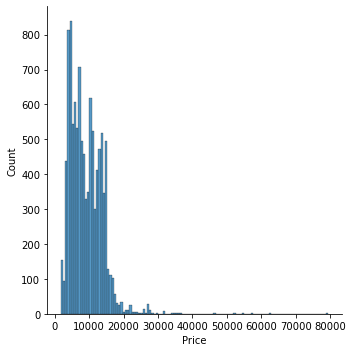

In [43]:
# Handling outliers in Price feature as we observed earlier in the boxplot
sns.displot(online_data["Price"])
online_data['Price'] = np.where(online_data['Price'] >= 35000, online_data['Price'].median(), online_data['Price'])


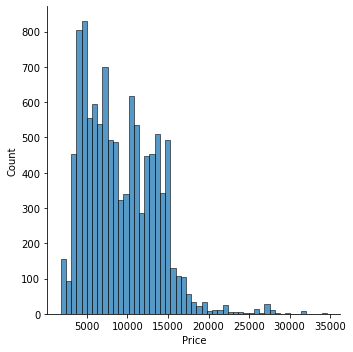

In [44]:
sns.displot(online_data["Price"])

 The distribution is no more right skewed as before

In [45]:
online_data.head()

,Airline,Destination,Total_Stops,Price,DOJ_Month,DOJ_Day,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897.0,3,24,22,20,1,10,2,7,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,2,7,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,2,7,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,23,30,2,7,0,1,0,0,0
4,3,5,1,13302.0,1,3,16,50,21,35,2,7,1,0,0,0,0


In [46]:
# extracting important features for the model
from sklearn.feature_selection import mutual_info_regression

In [47]:
x = online_data.drop("Price", axis=1)
y = online_data['Price']

In [48]:
mutual_info_regression(x,y)

array([0.97502484, 1.10518418, 0.78616507, 0.23062094, 0.19956446,
       0.33958943, 0.25809859, 0.39342228, 0.34431965, 0.00562972,
       0.00235019, 0.38960059, 0.45981005, 0.52516968, 0.13698636,
       0.20189474])

In [49]:
features_selected = pd.DataFrame(mutual_info_regression(x,y), index=x.columns)
features_selected.columns = ['Importance']
features_selected.sort_values(by='Importance', ascending=False)

,Importance
Destination,1.110126
Airline,0.972307
Total_Stops,0.786821
Source_Delhi,0.516273
Source_Kolkata,0.456505
Arrival_Time_Hour,0.397452
Source_Banglore,0.381994
Arrival_Time_Min,0.342844
Dep_Time_Hour,0.334534
Dep_Time_Min,0.251886


In [50]:
# Apply machine learning model
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
model = RandomForestRegressor()

In [54]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = model.predict(X_test)
print(y_pred)

[16643.21  6304.67  8925.08 ...  3495.64  6297.57  6805.91]


In [56]:
# evaluating the model
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

def evaluate(model):
    r2_score = metrics.r2_score(y_test, y_pred)
    print("r2 score is {}".format(r2_score))
    print("MSE is {}".format(metrics.mean_squared_error(y_test, y_pred)))
    print("RMSE is {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print("MAPE is {}".format((mean_absolute_percentage_error(y_test, y_pred) * 100)))
    sns.displot(y_test - y_pred)

r2 score is 0.81807118064786
MSE is 3541717.422751822
RMSE is 1881.9451168277521
MAPE is 13.076695799331967


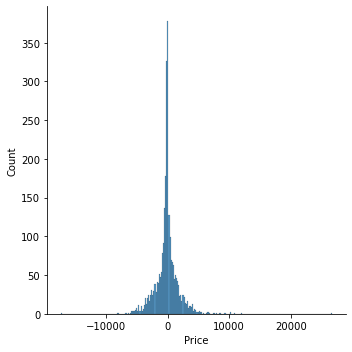

In [57]:
evaluate(model)

### if the error between the desired output(y_test) and predicted output(y_pred) is 0 majority of the test data was predicted right

In [58]:
# using another model to predict my test data
from sklearn.linear_model import LinearRegression

In [59]:
model2 = LinearRegression()

In [60]:
model2.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred2 = model2.predict(X_test)
print(y_pred2)

[12632.88583203  8727.38992076  8926.39407216 ...  3107.40163115
  9621.09727053  8195.46258794]


In [62]:
def evaluate(ml):
    r2_score = metrics.r2_score(y_test, y_pred2)
    print("r2 score is {}".format(r2_score))
    print("MSE is {}".format(metrics.mean_squared_error(y_test, y_pred2)))
    print("RMSE is {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
    print("MAPE is {}".format((mean_absolute_percentage_error(y_test, y_pred2) * 100)))
    sns.displot(y_test - y_pred2)

r2 score is 0.5859616542552206
MSE is 8060332.7610963145
RMSE is 2839.072517759332
MAPE is 24.391655867494467


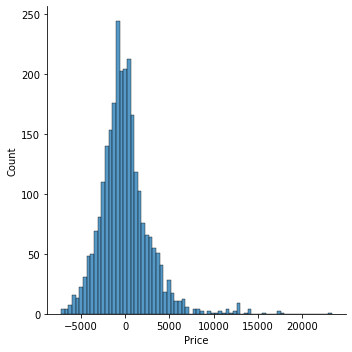

In [63]:
evaluate(model2)

In [64]:
# Cross validate the model
from sklearn.model_selection import RandomizedSearchCV

In [65]:
reg_model = RandomForestRegressor()

In [66]:
n_estimators = [int(x) for x in np.linspace(1000,1300,6)]

max_features = ["auto", "sqrt"]

max_depth = [int(x) for x in np.linspace(5,34,4)]

min_samples_split = [5,10,15,90]

In [67]:
rand_grid = {
    'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
    
}
rand_grid

{'n_estimators': [1000, 1060, 1120, 1180, 1240, 1300],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 14, 24, 34],
 'min_samples_split': [5, 10, 15, 90]}

In [68]:
cross_val = RandomizedSearchCV(reg_model, param_distributions=rand_grid, cv=3, verbose=2, n_jobs=1)

In [69]:
cross_val.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=1000; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=1000; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=1000; total time=   2.9s
[CV] END max_depth=34, max_features=auto, min_samples_split=15, n_estimators=1060; total time=  12.2s
[CV] END max_depth=34, max_features=auto, min_samples_split=15, n_estimators=1060; total time=  12.3s
[CV] END max_depth=34, max_features=auto, min_samples_split=15, n_estimators=1060; total time=  12.2s
[CV] END max_depth=24, max_features=auto, min_samples_split=5, n_estimators=1180; total time=  16.8s
[CV] END max_depth=24, max_features=auto, min_samples_split=5, n_estimators=1180; total time=  17.0s
[CV] END max_depth=24, max_features=auto, min_samples_split=5, n_estimators=1180; total time=  16.5s
[CV] END max_depth=14, max_

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 14, 24, 34],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 90],
                                        'n_estimators': [1000, 1060, 1120, 1180,
                                                         1240, 1300]},
                   verbose=2)

In [70]:
cross_val.best_params_

{'n_estimators': 1180,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 24}

In [71]:
y_pred3 = cross_val.predict(X_test)
metrics.r2_score(y_test, y_pred3)

0.838672907062342

#### Using the best parameters the model's accuracy increased as compared to the other accuracy from the r2 score